# Исследование объявлений о продаже квартир с целью выявления факторов, влияющих на конечную стоимость объекта

*Цель проекта:*

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно определить рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

*План исследования:*

- Изучение общей информаци
- Подготовка данных
- Исследовательский анализ данных
- Выведение общего вывода, подведение итогов исследования и выработка параметров для сервиса на основе полученных результатов

## Изучение общей информации

In [1]:
#импортируем библиотеку и открываем файл с данными для изучения
import pandas as pd
data = pd.read_csv("/datasets/real_estate_data.csv")
data.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Увидели,что отображается некорректно. Нужно поставить адекватный разделитель столбцов.


In [2]:
data = pd.read_csv("/datasets/real_estate_data.csv", sep='\t')
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Теперь всё отображается корректно. Посмотрим на форму и базовое инфо о датафрейме.

Описание данных:
Описание данных
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

- balcony — число балконов

- ceiling_height — высота потолков (м)

- cityCenters_nearest — расстояние до центра города (м)

- days_exposition — сколько дней было размещено объявление (от публикации до снятия)

- first_day_exposition — дата публикации

- floor — этаж

- floors_total — всего этажей в доме

- is_apartment — апартаменты (булев тип)

- kitchen_area — площадь кухни в квадратных метрах (м²)

- last_price — цена на момент снятия с публикации

- living_area — жилая площадь в квадратных метрах (м²)

- locality_name — название населённого пункта

- open_plan — свободная планировка (булев тип)

- parks_around3000 — число парков в радиусе 3 км

- parks_nearest — расстояние до ближайшего парка (м)

- ponds_around3000 — число водоёмов в радиусе 3 км

- ponds_nearest — расстояние до ближайшего водоёма (м)

- rooms — число комнат

- studio — квартира-студия (булев тип)

- total_area — общая площадь квартиры в квадратных метрах (м²)

- total_images — число фотографий квартиры в объявлении

In [3]:
#Технический комментарий
#Будем работать с копией для устранения возможных ошибок
df = data.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Увидели, что:

1) в датафрейме 23698 строк и 22 колонки.

2) есть пропущенные значения в ряде колонок, и их довольно много.

3) в список параметров входят такие характеристики как площадь, этаж, цена, район, состав жилого помещения, элементы инфраструктуры в районе и т.п.

4) дата публикации оформлена как строка, это надо будет переделать в числовой формат.

5) столбцы cityCenters_nearest, ponds_around3000, parks_around3000 названы не очень понятно.


Для пущей наглядности построим гистрограммы по всем столбцам датафрейма.


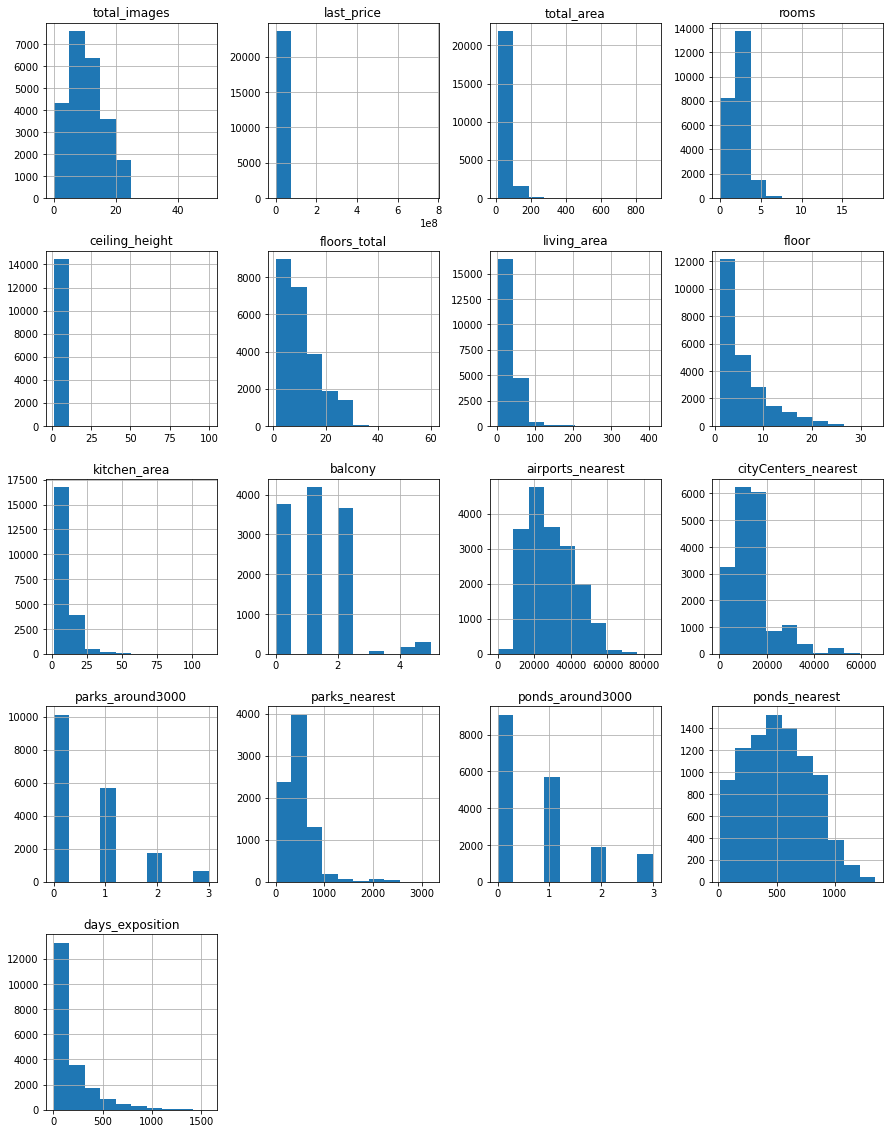

In [5]:
df.hist(figsize=(15, 20));

Какие выводы можно сделать после просмотра гистаграмм?

1) Колонка "сколько дней было размещено объявление" вызывает интерес, так как есть небольшое количество объявлений, которые висели больше 4 лет

2) В колонке с ценой есть жирный хвост в почти 800 000 000

3) В колонке с высотой потолка есть хвост в 100 метров

4) В колонке с комнатами есть хвост в около 15 комнат

5) В колонке с общей площадью есть хвост в около 800 квадратных метров

5) В колонке с жилой площадью есть хвост в около 400 квадратных метров

5) В колонке с площадью кухни есть хвост в около 100 квадратных метров

6) Остальные колонки особых подозрений не вызывают


## Предобработка данных

In [6]:
#начнем с колонок - сделаем их более читаемыми и удобрными, изменив регистр на змеиный
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [7]:
#исправим названия нескольких столбцов и сразу проверим, что все исправилось
df.rename(columns={
    'cityCenters_nearest': 'city_center_nearest_m',
    'parks_around3000': 'parks_around_3000m',
    'ponds_around3000': 'ponds_around_3000m'
},  inplace=True)

df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_center_nearest_m',
       'parks_around_3000m', 'parks_nearest', 'ponds_around_3000m',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [8]:
#удалим явные дубликаты в датафрейме. сначала проверим, сколько их
df.duplicated().sum()

0

Явных дубликатов 0. Ничего удалять не надо. Идём дальше.

In [9]:
#Посмотрим, в каких колонках есть пропуски:
df.isnull().sum()

total_images                 0
last_price                   0
total_area                   0
first_day_exposition         0
rooms                        0
ceiling_height            9195
floors_total                86
living_area               1903
floor                        0
is_apartment             20924
studio                       0
open_plan                    0
kitchen_area              2278
balcony                  11519
locality_name               49
airports_nearest          5542
city_center_nearest_m     5519
parks_around_3000m        5518
parks_nearest            15620
ponds_around_3000m        5518
ponds_nearest            14589
days_exposition           3181
dtype: int64

Колонки с пропусками
- высота потолка
- всего этажей в доме
- жилая площадь в квадратных метрах (м²)
- является ли объект апартаментами или нет
- площадь кухни в квадратных метрах (м²)
- число балконов
- название населённого пункта
- расстояние до ближайшего аэропорта в метрах (м)
- расстояние до центра города (м)
- число парков в радиусе 3 км
- расстояние до ближайшего парка (м)
- число водоёмов в радиусе 3 км
- расстояние до ближайшего водоёма (м)
- сколько дней было размещено объявление

*Попробуем разобраться с этими пропусками*

- Высота потолка чаще всего зависит от типа здания и года постройки. Такой информации в данных нет. Пока оставим эти пропуски.
- В количестве этажей в здании пропусков слишком мало, они вряд ли значительно повлияют на результат анализа. 
- Жилая площадь в квадратных метрах (м²) и площадь кухни в квадратных метрах (м²) - пропусков не очень много, но заполнить это можно, имея инфо о здании. Такого инфо нет, пока оставляем так.
- Колонка "является ли объект апартаментами или нет" имеет только 2775 ненулевых значений. Заполнить такое количество пропусков не представляется реальным, даже если бы была документация по зданиям.
- Балконы. Если не указано их число, то скорее всего, их ноль - *заменим позже это на ноль*
- "название населённого пункта": пропусков настолько мало, что они вряд ли повлияют на результаты. Однако, сама колонка чуть ли не самая важная. *Удалим их попозже*.
- Пропуски в инфо про ближайшие аэропорты, водоёмы и парки: они могут быть объяснены тем, что эти объекты расположены в сильном отдалении. Настолько сильном, что считать никто уже и не стал (судя по гистограммам, для аэропортов предельное расстояние около 80 км, а для парков это 2.5 км, и водоёмов - около полутора км. Пока не будем это менять, так как неясно, релевантно это для анализа или нет.
- пропуски в колонке "отдаление от центра города". *Теоретически, можно подставить для пропущенных значений среднее по районам*.
- "сколько дней было размещено объявление": пропуски есть. Важно, что в колонке "дата публикации" пропусков нет. Возможно, около 3000 пропусков объясняется тем, что это жилье еще не было продано, то есть объявление еще размещено пока. Заполнять не будем.

Таким образом, будем заполнять пропуски в колонках "балконы" и удалим их в колонке "населенный пункт".


In [10]:
#Начнём убирать пропуски с балконов. Посмотрим, какие там уникальные значения?
df["balcony"].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [11]:
#Значения от 0 до 5 и Nan
#Заменим Nan на 0
df['balcony'].fillna(0, inplace=True)

In [12]:
#Попробуем заменить nan в "city_center_nearest_m" на среднее по этим населенным пунктам
for l in df['locality_name'].unique():
    # на каждом шаге цикла с помощью атрибута loc выбираем строки,
    # в которых в locality_name текущий населённый пункт (l) и есть пропуски в cityCenters_nearest
    df.loc[(df['locality_name'] == l) & (df['city_center_nearest_m'].isna()), 'city_center_nearest_m'] = \
    df.loc[(df['locality_name'] == l), 'city_center_nearest_m'].mean()
    # и записываем в них среднее значение city_center_nearest_m среди строк с  текущим населённым пунктом (l)

In [13]:
#проверка
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   total_images           23699 non-null  int64  
 1   last_price             23699 non-null  float64
 2   total_area             23699 non-null  float64
 3   first_day_exposition   23699 non-null  object 
 4   rooms                  23699 non-null  int64  
 5   ceiling_height         14504 non-null  float64
 6   floors_total           23613 non-null  float64
 7   living_area            21796 non-null  float64
 8   floor                  23699 non-null  int64  
 9   is_apartment           2775 non-null   object 
 10  studio                 23699 non-null  bool   
 11  open_plan              23699 non-null  bool   
 12  kitchen_area           21421 non-null  float64
 13  balcony                23699 non-null  float64
 14  locality_name          23650 non-null  object 
 15  ai

Видим, что в колонке  city_center_nearest_m до сих пор 18305. Значит, среднее подставить не получилось.
Видимо, для каких-то населенных пунктов дистанция для центра города не указана впринципе.
Можно было бы предположить, что это какие-то маленькие города.
Вторая гипотеза: такое расстояние указано только для СПБ.
Проверим это.

In [14]:
df_spb = df.query("locality_name == 'Санкт-Петербург'")
print(len(df_spb))
empty_city_center = df[df['city_center_nearest_m'].isna()]
print(len(empty_city_center))

15721
5394


Стало ясно, что расстояние до центра указано не только для СПБ.


In [15]:
#Теперь удалим то небольшое количество строк, где не указано место.
df = df.dropna(subset=['locality_name'])

In [16]:
#проверяем еще раз
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   total_images           23650 non-null  int64  
 1   last_price             23650 non-null  float64
 2   total_area             23650 non-null  float64
 3   first_day_exposition   23650 non-null  object 
 4   rooms                  23650 non-null  int64  
 5   ceiling_height         14490 non-null  float64
 6   floors_total           23565 non-null  float64
 7   living_area            21752 non-null  float64
 8   floor                  23650 non-null  int64  
 9   is_apartment           2760 non-null   object 
 10  studio                 23650 non-null  bool   
 11  open_plan              23650 non-null  bool   
 12  kitchen_area           21381 non-null  float64
 13  balcony                23650 non-null  float64
 14  locality_name          23650 non-null  object 
 15  ai

С пропусками разобрались. Перейдем к типам данных. 
Нужно перевести в адекватный формат колонку first_day_exposition. Сейчас там Object, сделаем datetime64. Переведем и сразу проверим. Теперь мы сможем вытащить год, месяц и т.д.

In [17]:
df.loc[:, 'first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [18]:
#заполним нулевые значения в 'is_apartment' значением false
df['is_apartment'].fillna(False, inplace=True)

In [19]:
#Колонку про апартаменты приведем в логическому типу вместо строкового
df['is_apartment'] = df['is_apartment'].astype(bool)
#сразу проверяем
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           23650 non-null  int64         
 1   last_price             23650 non-null  float64       
 2   total_area             23650 non-null  float64       
 3   first_day_exposition   23650 non-null  datetime64[ns]
 4   rooms                  23650 non-null  int64         
 5   ceiling_height         14490 non-null  float64       
 6   floors_total           23565 non-null  float64       
 7   living_area            21752 non-null  float64       
 8   floor                  23650 non-null  int64         
 9   is_apartment           23650 non-null  bool          
 10  studio                 23650 non-null  bool          
 11  open_plan              23650 non-null  bool          
 12  kitchen_area           21381 non-null  float64       
 13  b

In [20]:
df["is_apartment"].value_counts()

False    23600
True        50
Name: is_apartment, dtype: int64

Теперь идем смотреть на дубликаты в столбце locality_name. Выведем список уникальных значений и их число.

In [21]:
print(len(df['locality_name'].unique()))
print(df['locality_name'].unique())

364
['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый

Просматриваем это. Помимо стандартных е VS ё заметно, что есть еще такие дубликаты как 'деревня Кудрово' VS  Кудрово,
'городской посёлок Советский VS. 'поселок городского типа Советский'.

In [22]:
# Приводим всё к нижнему регистру
df["locality_name"] = df["locality_name"].str.lower()

# Приводим е/ё-дубликаты к общей форме
df["locality_name"] = df["locality_name"].str.replace('посёлок', 'поселок')

# Сразу посмотрим, как изменилось число уникальных значений
print(len(df['locality_name'].unique()))

330


Только е/ё-дубликатов было больше 30! Посмотрим теперь на семантику.

In [23]:
#Здесь приведем к общей форме оставшиеся неявные дубликаты.
#Сделаем через регулярные выражениям

# Создаём список слов для замены
import re

words_to_remove = ['коттеджный', 'деревня', 'поселок', 'садовое товарищество', 'при железнодорожной станции', 'городской', 'городского типа', 'станции', 'при станции']

# Создаем регулярное выражение для поиска ключевых слов с пробелами вокруг них
pattern = '|'.join(fr'\s*{re.escape(word)}\s*' for word in words_to_remove)

# Прибегаем к методу .str.contains() для поиска строк, содержащих эти слова
mask = df['locality_name'].str.contains(pattern, case=False, regex=True)

# Заменяем найденные слова на пробелы, оставляя пробелы
df['locality_name'] = df['locality_name'].str.replace(pattern, '', case=False, regex=True)

# Удаляем лишние пробелы
df['locality_name'] = df['locality_name'].str.strip()

# Удаляем строки, которые стали пустыми после удаления ключевых слов
df = df[df['locality_name'] != '']

print(len(df['locality_name'].unique()))
print(df['locality_name'].unique())

307
['санкт-петербург' 'шушары' 'янино-1' 'парголово' 'мурино' 'ломоносов'
 'сертолово' 'петергоф' 'пушкин' 'кудрово' 'коммунар' 'колпино'
 'красный бор' 'гатчина' 'фёдоровское' 'выборг' 'кронштадт' 'кировск'
 'новое девяткино' 'металлострой' 'лебяжье' 'сиверский' 'молодцово'
 'кузьмоловский' 'новая ропша' 'павловск' 'пикколово' 'всеволожск'
 'волхов' 'кингисепп' 'приозерск' 'сестрорецк' 'куттузи' 'аннино'
 'ефимовский' 'плодовое' 'заклинье' 'торковичи' 'первомайское'
 'красное село' 'понтонный' 'сясьстрой' 'старая' 'лесколово' 'новый свет'
 'сланцы' 'село путилово' 'ивангород' 'шлиссельбург' 'никольское'
 'зеленогорск' 'сосновый бор' 'оржицы' 'кальтино' 'романовка' 'бугры'
 'рощино' 'кириши' 'луга' 'волосово' 'отрадное' 'село павлово' 'оредеж'
 'село копорье' 'молодёжное' 'тихвин' 'победа' 'нурма' 'синявино' 'тосно'
 'стрельна' 'бокситогорск' 'александровская' 'лопухинка' 'пикалёво'
 'терволово' 'советский' 'подпорожье' 'петровское' 'токсово' 'сельцо'
 'вырица' 'кипень' 'келози' 'варт

Получилось не очень красиво (Дзержинского, например), но как есть, так как было много таких скрытых дубликатов. Теперь похоже на правду, вручную неявных дубликатов насчитала около 20. Работу с дубликатами можно считать законченной.

То же самое можно сказать и о предобработке.

**Промежуточный вывод:**

- в целом данные правдоподобны. есть некоторое странности и аномалии, такие как цена в почти 800 000 000 и потолки в 100 метров.
рассмотрим все аномалии ниже
- явных дубликатох было 0. неявных около 60. все они замерджены в общую форму
- были заполнены пропуски в столбцах "балконы" и в колонке "населенный пункт" были удалены дубликаты. 
- пропуски в остальных колонках были оставлены, так как неясно пока, нужно ли это будет в анализе.

**Приступим к построению новых столбцов.**


In [24]:
#выведем сюда датафрейм, чтобы не мотать в начало
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest_m,parks_around_3000m,parks_nearest,ponds_around_3000m,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,11.0,2.0,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,NaN,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [25]:
#Добавляем столбец "цена одного квадратного метра"
df["one_square_m_price"] =df["last_price"] / df["total_area"]
df["one_square_m_price"] = df["one_square_m_price"].round(decimals=2)

In [26]:
#Добавляем столбец "день недели публикации объявления" (0 — понедельник, 1 — вторник и так далее)
df["weekday_exp"] = df['first_day_exposition'].dt.weekday
#распределяем номера через функцию

def weekday (day):
      
    if day == 0:
        return 'понедельник'
    if day == 1:
        return 'вторник'
    if day == 2:
        return 'среда'
    if day == 3:
        return 'четверг'
    if day == 4:
        return 'пятница'
    if day == 5:
        return 'суббота'
    if day == 6:
        return 'воскресенье'


# Применяем её к новому столбцу
df['weekday_exp'] = df['weekday_exp'].apply(weekday)


In [27]:
# Добавляем столбец "месяц публикации объявления". Повторяем процесс
df["month_exp"] = df['first_day_exposition'].dt.month
#распределяем номера через функцию

def month(m):
      
    if m == 1:
        return 'январь'
    if m == 2:
        return 'февраль'
    if m == 3:
        return 'март'
    if m == 4:
        return 'апрель'
    if m == 5:
        return 'май'
    if m == 6:
        return 'июнь'
    if m == 7:
        return 'июль'
    if m == 8:
        return 'август'
    if m == 9:
        return 'сентябрь'
    if m == 10:
        return 'октябрь'
    if m == 11:
        return 'ноябрь'
    if m == 12:
        return 'декабрь'


# Применяем её к новому столбцу
df['month_exp'] = df['month_exp'].apply(month)


In [28]:
#Добавляем столбец "год публикации объявления"

df['year_exp'] = df['first_day_exposition'].dt.year

In [29]:
#Добавляем столбец "тип этажа квартиры" (значения — «первый», «последний», «другой»)
#Выведем уникальные значения, чтобы сгруппировать в функции
df["floor"].unique()

array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31])

In [30]:
#распределяем номера через функцию. здесь сложнее - нужно идти по рядам
#допольнительная сложность заключается в том, что для строк, где неизвестно количество этажей,
#нужно вывести "неизвестно" в тип этажа

import math
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    elif math.isnan(row['floors_total']):
        return 'неизвестно'
    else:
        return 'другой'


df['floor_type'] = df.apply(floor_type, axis=1)


In [31]:
#Добавляем столбец "расстояние до центра города в километрах"

def round_distance(row):
    if not pd.isna(row['city_center_nearest_m']):
        return round(row['city_center_nearest_m'] / 1000)
    else:
        return "неизвестно"

df["city_center_nearest_km"] = df.apply(round_distance, axis=1)


In [32]:
#Проверим все новые столбцы
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000m,ponds_nearest,days_exposition,one_square_m_price,weekday_exp,month_exp,year_exp,floor_type,city_center_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.37,четверг,март,2019,другой,16
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.79,вторник,декабрь,2018,первый,19
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.71,четверг,август,2015,другой,14
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,84.0,3.0,234.0,424.0,408176.10,пятница,июль,2015,другой,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.00,вторник,июнь,2018,другой,8


Столбцы добавлены. Переходим к работе с аномальными значениями

## Исследовательский анализ данных

Изучим перечисленные ниже параметры объектов и построим отдельные гистограммы для каждого из этих параметров. В некоторых параметрах встречаются редкие и выбивающиеся значения. При построении гистограмм удалим их.
Список параметров:
  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - цена объекта;
  - количество комнат;
  - высота потолков;
  - этаж квартиры;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
  - расстояние до ближайшего аэропорта;
  - расстояние до ближайшего парка;
  - день и месяц публикации объявления

На общей гистограмме было видно, что во всех колонках по площадям были очень жирные хвосты. Посмотрим на срезы по межквартильному размаху.

In [33]:
#СОздаем функцию для удаления выбросов и подсчета удаленных строк

def remove_outliers_calculate(df, columns):
    outlier_coefficient = 1.5
    df_copy = df.copy()
    removed_percentages = {}
    for column in columns:
        Q1 = df_copy[column].quantile(0.25)
        Q3 = df_copy[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - outlier_coefficient * IQR
        upper_bound = Q3 + outlier_coefficient * IQR
        
        filtered_df = df_copy[(df_copy[column] >= lower_bound) & (df_copy[column] <= upper_bound)]
        
        # Вычисляем процент удаленных выбросов
        removed_percentage = ((len(df_copy) - len(filtered_df)) / len(df_copy)) * 100
        
        # Сохраняем процент в словаре
        removed_percentages[column] = removed_percentage
        
        # Обновляем
        df_copy = filtered_df
    
    return df_copy, removed_percentages
#создаем датафрейм без выбросов
df_no_outliers, removed_percentages = remove_outliers_calculate(df, ["total_area", "living_area", "kitchen_area", "ceiling_height", "rooms", "days_exposition", "last_price", "floors_total", "city_center_nearest_m", "balcony", "parks_nearest"])


for column, percentage in removed_percentages.items():
    print(f"Удалено {percentage:.2f}% выбросов из столбца {column}")


Удалено 5.26% выбросов из столбца total_area
Удалено 8.43% выбросов из столбца living_area
Удалено 8.21% выбросов из столбца kitchen_area
Удалено 40.18% выбросов из столбца ceiling_height
Удалено 0.00% выбросов из столбца rooms
Удалено 22.46% выбросов из столбца days_exposition
Удалено 4.97% выбросов из столбца last_price
Удалено 0.14% выбросов из столбца floors_total
Удалено 32.65% выбросов из столбца city_center_nearest_m
Удалено 2.10% выбросов из столбца balcony
Удалено 62.18% выбросов из столбца parks_nearest


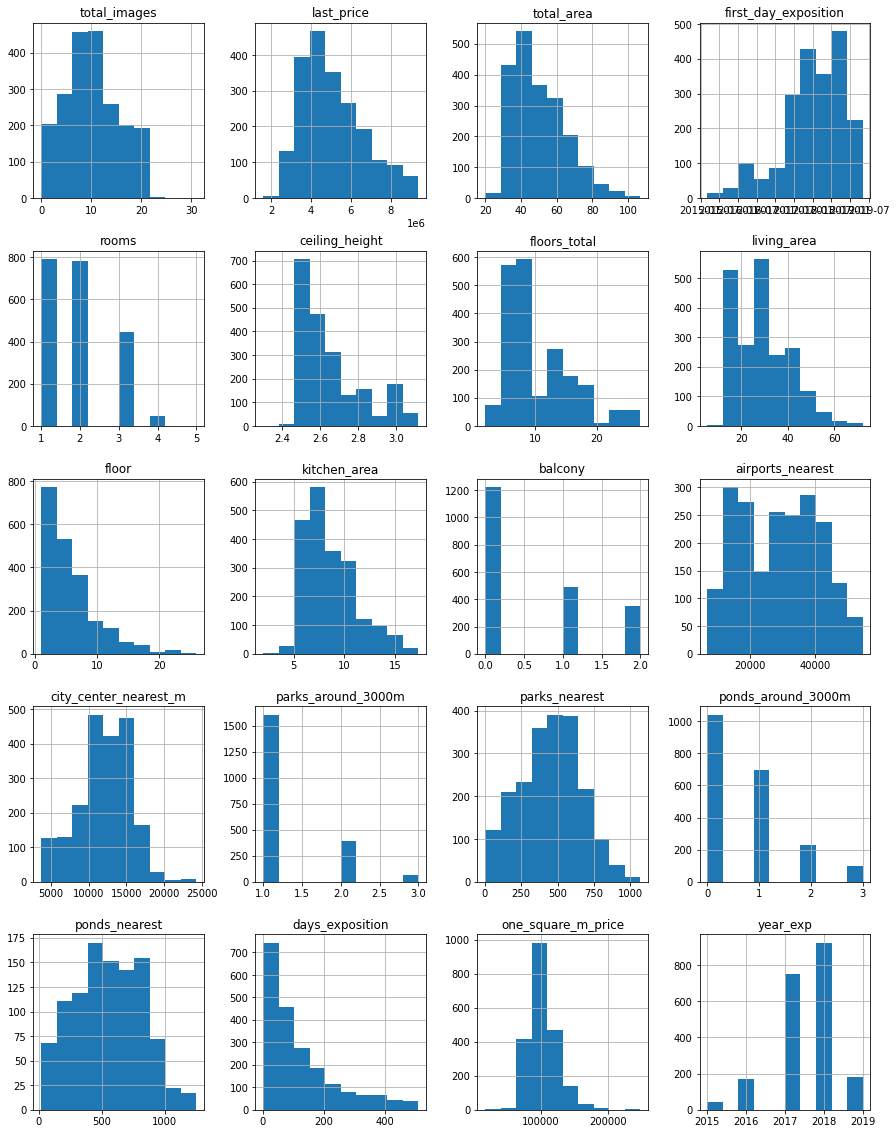

In [34]:
#строим гистраграммы для всего датафрейма, но будем смотреть только на нужные нам колонки
df_no_outliers.hist(figsize=(15, 20));

Посмотрев на доли, можем сказать, что удалены приемлемые количества выбросов, так как нужно еще иметь в виду, что во многих колонках было много нулей.
Но тем не менее можем вручную расширить диапазоны по last price и total area, так как бывают квартиры больше 120 метров и цены до 20 миллионов это не так уж и редко.
Создадим окончательный датафрейм с отфильтрованными данными.


In [35]:
last_price_condition = (df["last_price"] >= 430000) & (df["last_price"] <= 20000000)
total_area_condition = (df["total_area"] <= 170)

# Применяем условия для фильтрации строк
filtered_df = df[last_price_condition & total_area_condition]

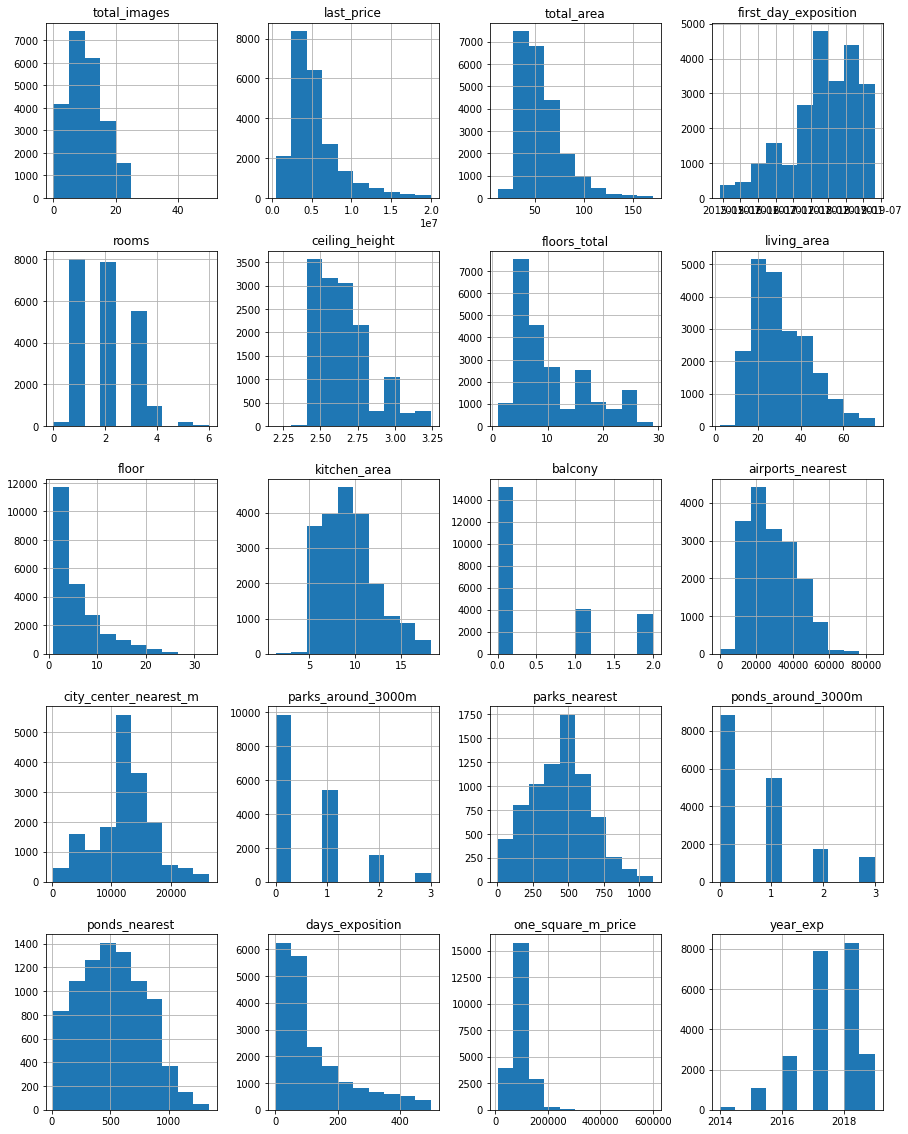

In [36]:
#создаем новую функцию, так как в старой считались еще проценты
#здесь заменим выбросы на среднее. это приемлемо, так как с колонками,
#где в выбросы входили довольно нормальные значения, мы уже разобрались
#если будем удалять, то датафрейм сильно сожмется
#помним, что пропуски не трогаем

import pandas as pd
import numpy as np

def replace_outliers_with_median(df, columns):
    df_copy = df.copy()  # Уже знаю, что будет warning без этого шага
    
    for column in columns:
        Q1 = df_copy[column].quantile(0.25)
        Q3 = df_copy[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_copy.loc[(~df_copy[column].isna()) & (df_copy[column] < lower_bound), column] = df_copy[column].median()
        df_copy.loc[(~df_copy[column].isna()) & (df_copy[column] > upper_bound), column] = df_copy[column].median()
    
    return df_copy
columns_to_replace_outliers = ["living_area", "kitchen_area", "ceiling_height", "rooms", "days_exposition", "floors_total", "city_center_nearest_m", "balcony", "parks_nearest"]


final_filtered_df = replace_outliers_with_median(filtered_df, columns_to_replace_outliers)
#срзу проверим частоту и разбежку
final_filtered_df.hist(figsize=(15, 20));

**Теперь все кажется упорядоченным**

- цены до 20 миллионов - это более-менее нормально. Выбросы в сотни миллоинов возможно просто ошибки. Кто-то мог добавить лишний ноль. Мы от этого безболезненно избавились.
- площади до 170 метров (это главнее площадей по отдельности). Кто-то также мог добавить лишний ноль и получить огромные площади. Мы от этого безболезненно избавились. По IQR потолок был 120, но расширила, так как это не очень редкие квартиры.
- оставили максимум 6 комнат. 19 комнат - это странно.
- сотались здания до 30 этажей - это норма
- высота потолков осталась до 3.2. График логичный, потому что потолки больше 3.2 - это уже какая-то особенная квартира и такого очень мало, это редкость. Плюс не вижу большого смысла приводить несколько значений от 27 до 32 метров к 2 и 3.2 метра. Так как эти значения приближены к средним и не повлияют на результаты исследования.
- 2 балкона - приближено к реальности.
- расстояние до аэропортов не трогала, аномалий не вижу. 
- расстояние до центра города нормализовано. 60 км до центра города - такое бывает, у нас же там много очень ПГТ. Но! Мы же будем анализировать позже цену за квадратный метр в зависимости от удаления от центра Питера. Поэтому такая колонка нам точно нужна, ведь отдаление на 60 км от центра Питера - это уже не Питер.
- длительность выставления объявления так же нормализована, 4-5 лет - это редкость
- расстояние до ближайшего парка было нормализовано, так как хвост был толстоват

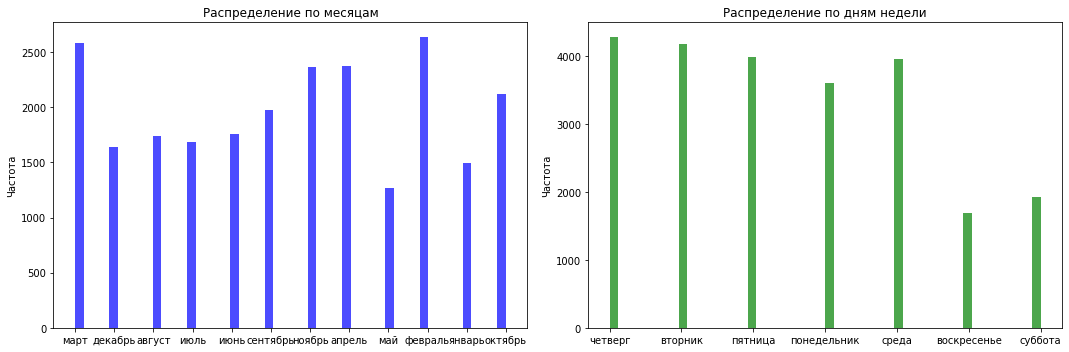

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
#Изучим день и месяц публикации объявления. Поставим рядом эти графики
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# График для столбца month_exp
ax1.hist(df["month_exp"], bins=50, color='blue', alpha=0.7)
ax1.set_title("Распределение по месяцам")
ax1.set_ylabel("Частота")

# График для столбца weekday_exp
ax2.hist(df["weekday_exp"], bins=50, color='green', alpha=0.7)
ax2.set_title("Распределение по дням недели")
ax2.set_ylabel("Частота")

plt.tight_layout()
plt.show()


Всё логично. Меньше всего публикаций в ВС и СБ, так как все отдыхают, а за объявления надо платить.
С маем и январем тоже все понятно - там праздники, все отдыхают.

**Промежуточный вывод:**

До построения отдельных гистаграмм учитывалось, что в некоторых колонках есть выбивающиеся значения,
такие как квартиры по 400-800 кв метров, цены в 760 000 000 миллионов, 19 комнат, потолки в 35 метров и т д.
Было принято решение отсечь все эти значения-выбросы, так как их слишком мало (в основном за жирные хвосты отвечали
25-50 самых больших значений, а для датафрейма на 23 000 строк это совсем немного.

Для выбора среза был выбран метод межквиртального размаха, так как так мы можем быть уверены,
что в наши выводы попадут только нормальные значения. Вдобавок, метод IQR прошел проверку на логику (больше
6 комнат - много, потолки выше 4 метров - суперредкий элит, площади в 800 метров - это уже какие-то дворцы, а не квартиры,
цены в 500 000 000 - 760 000 000 - вообще нереально.




**Идем дальше**

Теперь, когда мы закончили с аномалиями, можно приступить к размышлениями над тем, как быстро продавались квартиры.
Построим гистограмму, посчитаем среднее и медиану, подумаем, какие продажи можно считать быстрыми, а какие — необычно долгими?
Помним, что около 3000 строк не заполнены, но с этим ничего сделать нельзя. Сейчас просто исключим их из анализа.



In [38]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000m,ponds_nearest,days_exposition,one_square_m_price,weekday_exp,month_exp,year_exp,floor_type,city_center_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.37,четверг,март,2019,другой,16
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.79,вторник,декабрь,2018,первый,19
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.71,четверг,август,2015,другой,14
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,84.0,3.0,234.0,424.0,408176.10,пятница,июль,2015,другой,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.00,вторник,июнь,2018,другой,8


Рассчитаем данные и для колонки с выбросами, и без

In [39]:
average_days_exp_raw = df['days_exposition'].mean()
average_days_exp_filtered =final_filtered_df['days_exposition'].mean()
median_days_exp_raw = df['days_exposition'].median()
median_days_exp_filtered =final_filtered_df['days_exposition'].median()
print("Среднее количество дней до удаления выбросов:", average_days_exp_raw)
print("Среднее количество дней после удаления выбросов:", average_days_exp_filtered)

print("Медианное количество дней до удаления выбросов:", median_days_exp_raw)
print("Медианное количество дней после удаления выбросов:", median_days_exp_filtered)

Среднее количество дней до удаления выбросов: 180.7531998045921
Среднее количество дней после удаления выбросов: 123.00799718338196
Медианное количество дней до удаления выбросов: 95.0
Медианное количество дней после удаления выбросов: 93.0


Данные различаются. Склоняюсь к среднему без выбросов - 120 дней. Если посмотреть на все данные, можно сделать вывод, что в среднем квартиры продаются за 3-4 месяца.

Что касается необычайно долгих продаж - это будут те самые выбросы в 3-4 года. Может это жилье в плохом доме или какие-нибудь коммуналки.

Самые быстрые продажи осуществляются за несколько дней. Нет основания этому не верить, так как недорогие квартиры стоимостью до 5 миллионов в том же СПБ могут разобрать довольно быстро.

**Идем дальше**

Посмотрим, какие факторы больше всего влияют на общую стоимость объекта?
Через матрицу корреляции на основе нефильтрованных данных посмотрим, есть ли связь между ценой и следующими параметрами:

общая площадь;
жилая площадь;
площадь кухни;
количество комнат;
дата размещения (день недели, месяц, год).

(тип этажа позже посмотрим, ведь это не числовое значение)

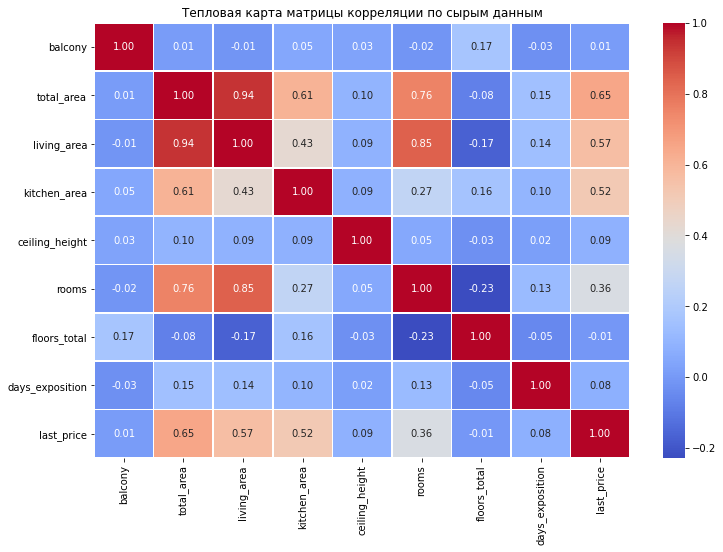

In [40]:
#создаем матрицу зависимости по данным с выбросами
correlation_matrix = df[["balcony", 'total_area', 'living_area', 'kitchen_area', "ceiling_height", 'rooms', "floors_total", 'days_exposition', 'last_price']].corr()
#сразу сделаем тепловую карту для наглядности


import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Тепловая карта матрицы корреляции по сырым данным')
plt.show()

Согласно этой матрице корреляции, есть линейная связь между площадями и количеством комнат,
хотя связь между комнатами и ценой не очень сильная. Сильнее всего с ценой связана таким образом связана общая площадь.

Удивительно, что нет связи с количество балконов.

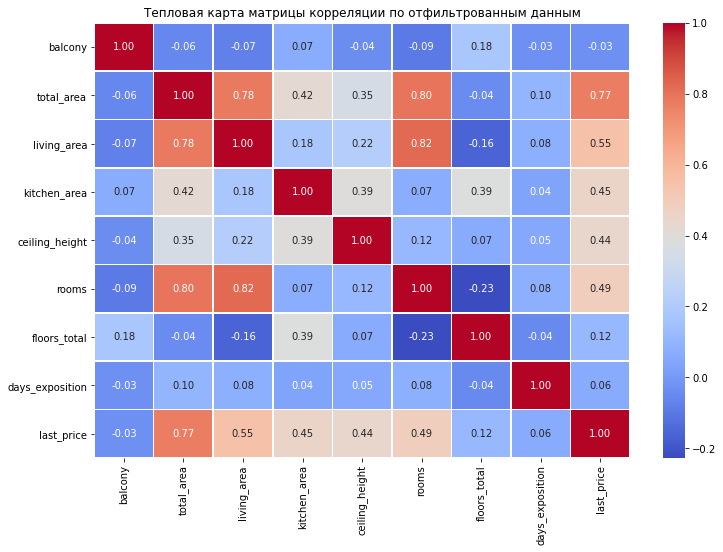

In [41]:
#Проведем такие же операции с отфильтрованными данными
#сразу делаем тепловую карту матрицы корреляции
correlation_matrix_filtered = final_filtered_df[["balcony", 'total_area', 'living_area', 'kitchen_area', "ceiling_height", 'rooms', "floors_total", 'days_exposition', 'last_price']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Тепловая карта матрицы корреляции по отфильтрованным данным')
plt.show()

Подросла линейная связь между общей площадью, высотой потолков и комнатами.

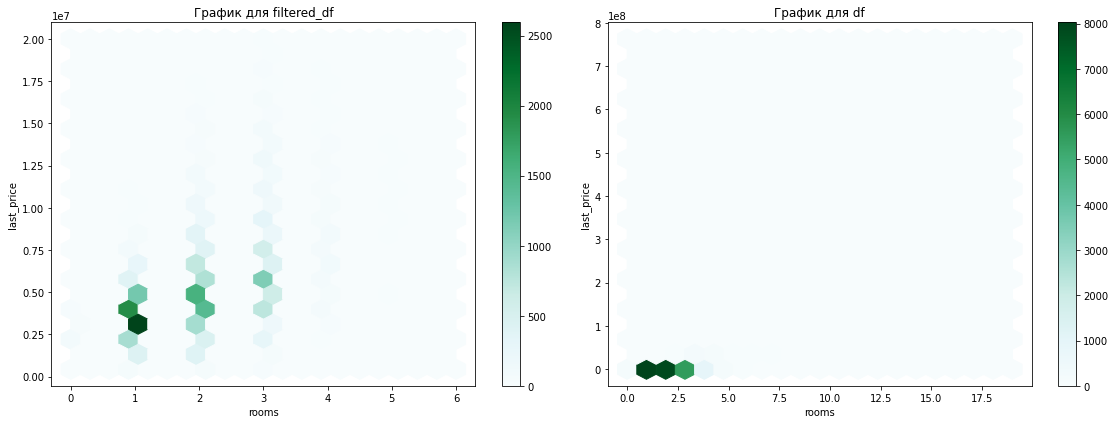

In [42]:
#Вообще с комнатами получалась неожиданная корреляция, потому что ожидалась более сильная линейная связь
#Сделаем 2 графика для уверенности по сырым и отфильтрованным комнатам

ig, axes = plt.subplots(1, 2, figsize=(16, 6))

# График для final_filtered_df
final_filtered_df.plot(x='rooms', y='last_price', kind='hexbin', gridsize=20, ax=axes[0])
axes[0].set_title('График для filtered_df')

# График для df
df.plot(x='rooms', y='last_price', kind='hexbin', gridsize=20, ax=axes[1])
axes[1].set_title('График для df')

plt.tight_layout()

plt.show()

Подтвердилась эта связь

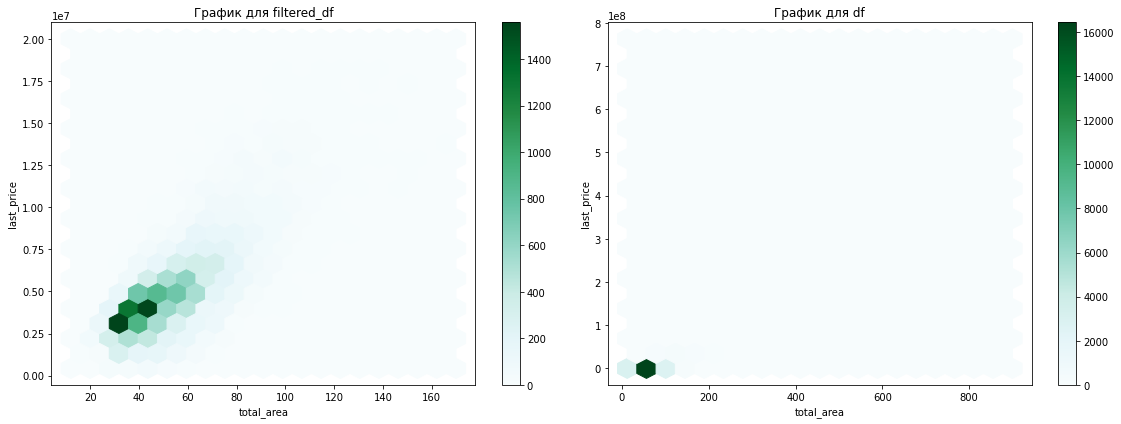

In [43]:
#Подтвердим выявленную связь между total_area и last_Price по сырым и отфильтрованным данным

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# График для final_filtered_df
final_filtered_df.plot(x='total_area', y='last_price', kind='hexbin', gridsize=20, ax=axes[0])
axes[0].set_title('График для filtered_df')

# График для df
df.plot(x='total_area', y='last_price', kind='hexbin', gridsize=20, ax=axes[1])
axes[1].set_title('График для df')

plt.tight_layout()
plt.show()

Подтвердилось, что использовать фильтрацию более логично.

In [44]:
#Теперь проверим этажи, и сделаем мы это с помощью сводной таблицы по датафрейму с отфильтрованной ценой
#Но мы также сравним и с нефильтрованной ценой на всякий случай

pivot_floor_type_filtered = final_filtered_df.pivot_table(index='floor_type', values='one_square_m_price', aggfunc='mean')

# Создаем таблицу для df
pivot_floor_type_df = df.pivot_table(index='floor_type', values='one_square_m_price', aggfunc='mean')

# Выводим таблицу для filtered_df
print("Таблица для final_filtered_df:")
print(pivot_floor_type_filtered)


print("\nТаблица для df:")
print(pivot_floor_type_df)

Таблица для final_filtered_df:
            one_square_m_price
floor_type                    
другой            98987.717161
неизвестно       106874.929750
первый            80061.149885
последний         86672.227550

Таблица для df:
            one_square_m_price
floor_type                    
другой           103486.317660
неизвестно       108096.410732
первый            81989.310038
последний         93378.957679


Из этого видно, что самые дешёвые квартиры на первом этаже. Самые дорогие, если не брать в счет пропуски, коих всего 86,
то можно сказать, что самые дорогие - квартиры ни на первом, ни на последнем этаже. Тенденции сохранены для обоих вариантов, значит, вывод "железный".

Так же интересно посмотреть, влияет ли близость центра города, парков, водоёмов и аэропортов на цену квадратного метра. Добавим эти колонки в фильтрованный датафрейм и бегло посмотрим на зависимость.

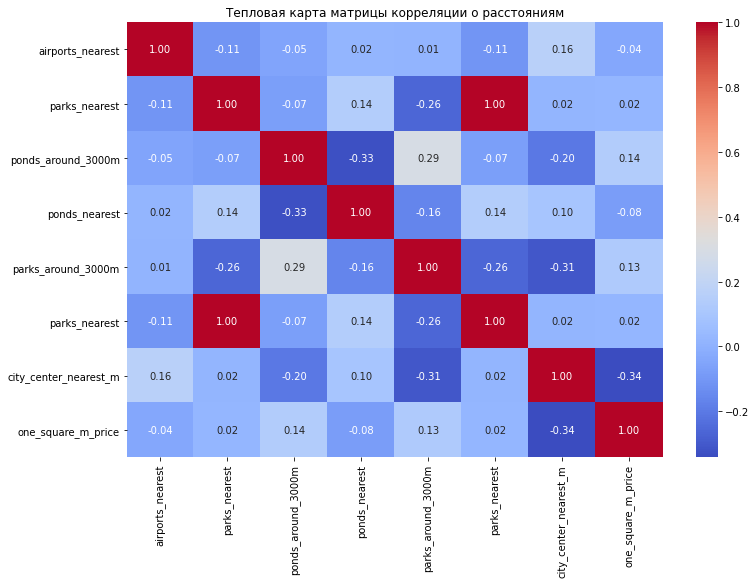

In [45]:
correlation_matrix_3 = final_filtered_df[['airports_nearest', "parks_nearest", 'ponds_around_3000m', 'ponds_nearest', 'parks_around_3000m', 'parks_nearest', "city_center_nearest_m", 'one_square_m_price']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_3, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта матрицы корреляции о расстояниям')
plt.show()

Самая сильная линейная связь между расстоянием от центра города и ценой за метр. Логично - чем дальше, тем дороже.

Напоследок посмотрим на зависимость между днем и месяцем выставления на продажу.

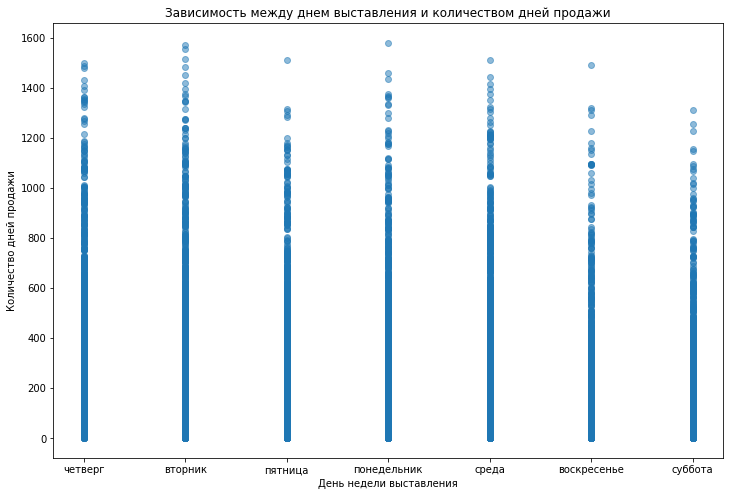

In [46]:
x = df['weekday_exp']
y = df['days_exposition']

# Построение диаграммы рассеяния
plt.figure(figsize=(12, 8))
plt.scatter(x, y, alpha=0.5)
plt.title('Зависимость между днем выставления и количеством дней продажи')
plt.xlabel('День недели выставления')
plt.ylabel('Количество дней продажи')
plt.show()

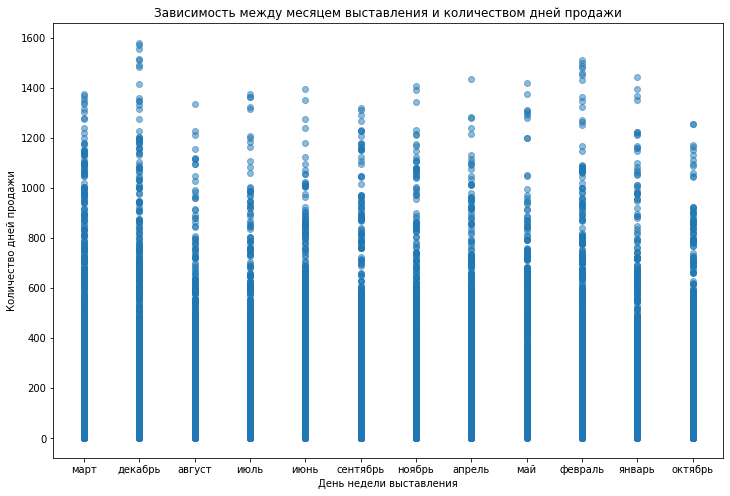

In [47]:
x = df['month_exp']
y = df['days_exposition']

# Построение диаграммы рассеяния
plt.figure(figsize=(12, 8))
plt.scatter(x, y, alpha=0.5)
plt.title('Зависимость между месяцем выставления и количеством дней продажи')
plt.xlabel('День недели выставления')
plt.ylabel('Количество дней продажи')
plt.show()

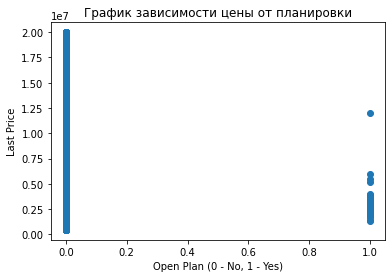

In [48]:
#Напоследок, посчитаем, насколько свободная планировка влияла на стоимость жилья
#Сначала переведем столбец в булев массив
final_filtered_df['open_plan'].astype(int)

plt.scatter(filtered_df['open_plan'], filtered_df['last_price'])
plt.xlabel('Open Plan (0 - No, 1 - Yes)')
plt.ylabel('Last Price')
plt.title('График зависимости цены от планировки')
plt.show()

Обнаружен еще один фактор, который может влиять на цены. Открытая планировка стоит меньше, судя по всему.

Результаты по месяцам логичны: то, что выставлялось в зимние месяцы, висело на сайте дольше времени. Наверное, все отдыхали.
Быстрее всего продавались выставленные в октябре квартиры. Может, хотели успеть к новому году?

По дням: быстрее всего продавалось выставленное в ПТ и СБ. Может, успевали обдумать на выходных?

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.
На всякий случай нужно проверить ситуацию с выбросами.
Построим сводные таблицы с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов.
Выведем эти таблицы вместе.

In [49]:
# Создаем таблицу для filtered_df
max_price_pivot_filtered = final_filtered_df.pivot_table(
    index="locality_name",
    values="one_square_m_price",
    aggfunc={"one_square_m_price": ["count", "mean"]}
)
max_price_pivot_filtered.columns = ["ads", "square_m_average_price"]
max_price_pivot_filtered["square_m_average_price"] = max_price_pivot_filtered["square_m_average_price"].round()
max_price_pivot_filtered = max_price_pivot_filtered.sort_values(by=("ads"), ascending=False)

# Создаем таблицу для df
max_price_pivot_df = df.pivot_table(
    index="locality_name",
    values="one_square_m_price",
    aggfunc={"one_square_m_price": ["count", "mean"]}
)
max_price_pivot_df.columns = ["ads", "square_m_average_price"]
max_price_pivot_df["square_m_average_price"] = max_price_pivot_df["square_m_average_price"].round()
max_price_pivot_df = max_price_pivot_df.sort_values(by=("ads"), ascending=False)

# Выводим таблицы с названиями
print("Таблица для filtered_df:")
print(max_price_pivot_filtered.head(10))
print("\nТаблица для df:")
print(max_price_pivot_df.head(10))

Таблица для filtered_df:
                   ads  square_m_average_price
locality_name                                 
санкт-петербург  14947                108844.0
мурино             590                 86088.0
кудрово            472                 95325.0
шушары             440                 78677.0
всеволожск         397                 67214.0
пушкин             359                101867.0
колпино            337                 75333.0
парголово          326                 90332.0
гатчина            307                 68746.0
выборг             235                 58076.0

Таблица для df:
                   ads  square_m_average_price
locality_name                                 
санкт-петербург  15721                114849.0
мурино             590                 86088.0
кудрово            472                 95325.0
шушары             440                 78677.0
всеволожск         398                 68654.0
пушкин             369                103126.0
колпино           

Как и ожидалось, больше всего объявлений в СПБ.
Но есть разница почти в 10 тысяч рублей для СПБ, так как там были выбросы.
Очевидно, что какие-нибудь шикарные квартиры на Невском проспекте повлияли на такой скачок.

In [50]:
#А теперь выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.
#Точно так же сравним с выбросами и без
print("Таблица для фильтрованных данных (Топ 10):")
print(max_price_pivot_filtered.sort_values(by=("square_m_average_price"), ascending=False).head(10))

print("\nТаблица для нефильтрованных данных (Топ 10):")
print(max_price_pivot_df.sort_values(by=("square_m_average_price"), ascending=False).head(10))


Таблица для фильтрованных данных (Топ 10):
                   ads  square_m_average_price
locality_name                                 
санкт-петербург  14947                108844.0
зеленогорск         22                108441.0
пушкин             359                101867.0
сестрорецк         180                101679.0
лисий нос            3                100661.0
мистолово           11                 98550.0
левашово             1                 96998.0
кудрово            472                 95325.0
парголово          326                 90332.0
стрельна            42                 89123.0

Таблица для нефильтрованных данных (Топ 10):
                   ads  square_m_average_price
locality_name                                 
зеленогорск         24                115123.0
санкт-петербург  15721                114849.0
репино               4                104239.0
пушкин             369                103126.0
сестрорецк         183                101758.0
лисий нос         

Если судить по фильтрованным данным, то самые дорогие метры в Петербурге.
А если по нефильтрованным, то в Зеленогорске. Очевидно, там был какой-то выброс.
Поэтому для финального отчета будет брать фильтрованный вариант.

In [51]:
#посмотрим самые недорогие квартиры
print("Таблица для фильтрованных данных (Топ 10 с конца):")
print(max_price_pivot_filtered.sort_values(by=("square_m_average_price"), ascending=False).tail(10))

print("\nТаблица для нефильтрованных данных (Топ 10 с конца):")
print(max_price_pivot_df.sort_values(by=("square_m_average_price"), ascending=False).tail(10))

Таблица для фильтрованных данных (Топ 10 с конца):
                 ads  square_m_average_price
locality_name                               
ям-тесово          2                 13712.0
сижно              1                 13710.0
бор                1                 13158.0
тёсово-4           1                 12931.0
малая романовка    1                 12725.0
совхозный          2                 12629.0
выскатка           2                 12335.0
вахнова кара       1                 11688.0
свирь              2                 11481.0
старополье         3                 11206.0

Таблица для нефильтрованных данных (Топ 10 с конца):
                 ads  square_m_average_price
locality_name                               
житково            2                 14956.0
ям-тесово          2                 13712.0
сижно              1                 13710.0
тёсово-4           1                 12931.0
малая романовка    1                 12725.0
совхозный          2                 126

Вот и нашли лидеров по цене за метр: самые дорогие метры в Санкт-Ретербурге, Зеленогорске, Пушкине, Сестрорецке,  Лисем Носе, Мистолово, Левашово, Кудрово, Парголово и Стрельна.

Самые дешевые метры в Старополье, Свири, Вахновой Каре, Выскатке, Совхозном, Малой Романовке, Тесово-4, Бору, Сижно, Ям-Тёсово.

Теперь выделим квартиры в Санкт-Петербурге и вычислим среднюю цену каждого километра.

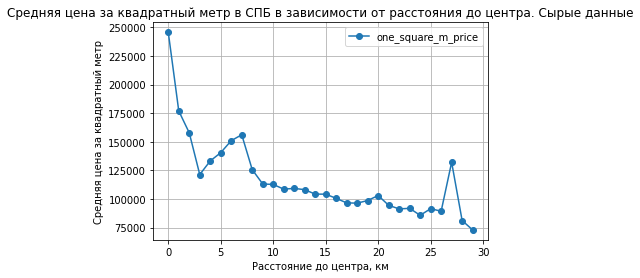

In [52]:
#Напишем функцию для выделения квартир в Питере
def spb(row):
    if row['locality_name'] == "санкт-петербург":
        return 'СПБ'
    else:
        return 'НЕ СПБ'

df["is_spb"] = df.apply(spb, axis=1)

#Посмотрим на график с нефильтрованными ценами
#Вычислим среднюю цену каждого километра в питерских квартирах.
#Посмотрим и на отфильтрованные цены, и с выбросами, чтобы избежать искажений
df[df["is_spb"] == "СПБ"].pivot_table(index = "city_center_nearest_km", values = "one_square_m_price").plot(marker='o', linestyle='-')
plt.title('Средняя цена за квадратный метр в СПБ в зависимости от расстояния до центра. Сырые данные')
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Средняя цена за квадратный метр')
plt.grid(True)
plt.show()


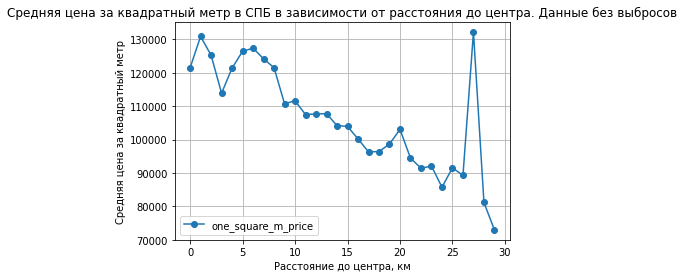

In [53]:
#Вычислим среднюю цену каждого километра в питерских квартирах, используюя отфильтрованные цены
final_filtered_df["is_spb"] = df["is_spb"] 

#Для удобства создаем отдельный датафрейм с отфильтрованными ценами и только питерскими квартирами
df_is_spb_filtered = final_filtered_df[final_filtered_df["is_spb"] == "СПБ"]

#считаем среднюю цену каждого километра
km_price_pivot_filtered = df_is_spb_filtered.pivot_table(index = "city_center_nearest_km", values = "one_square_m_price").plot(marker='o', linestyle='-')
plt.title('Средняя цена за квадратный метр в СПБ в зависимости от расстояния до центра. Данные без выбросов')
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Средняя цена за квадратный метр')
plt.grid(True)
plt.show()

Очевидно на обоих графиках, что цена падает по мере удаления от центра. Но второй график более плавный, несмотря на выброс на 27 километре. Видимо, так есть какой-то дорогой участок. Но мы проверим этот выброс, посчитав количество заведений в разрезе.

In [54]:
print(df_is_spb_filtered.pivot_table(index="city_center_nearest_km", values="one_square_m_price", aggfunc=["count", "mean"]))


                                    count               mean
                       one_square_m_price one_square_m_price
city_center_nearest_km                                      
0                                      13      121462.299231
1                                     152      130858.161184
2                                     250      125256.411120
3                                     313      113869.081629
4                                     606      121385.758977
5                                     763      126396.570026
6                                     501      127363.647206
7                                     337      124159.290950
8                                     553      121501.589512
9                                     577      110721.306603
10                                    701      111595.842739
11                                   1158      107482.885984
12                                   1638      107664.714658
13                      

*Всё сходится*

на 27 километре есть 2 каких-то очень дорогих объекта. Может, какой шикарный дом один.

### Общий вывод

На основе проведенной работы можно сделать следующие выводы:
    
В данных содержались ошибки и аномалии, такие как цены в 763 000 000 рублей, потолки в 100 метров, 19 комнат, площади в 800 метров. Эти данные похожи на ошибки, но их было немного.
Эти аномалии были исключены из анализа, но всё же для валидации были проведены рассчёты и для нефильтрованных данных.
Было удалено 58 дубликатов, явных и неявных.
Пропуски были заполнены только для балконов (0 балконов вместо отсутсвующих значений).


После проведения анализа можно сделать следующие выводы:

    - решение отсечь аномалии было верными, так как если бы мы это не сделали, не увидели бы, что в Зеленогорске жилье дороже, чем в СПБ
    - также увидели бы менее четкую связь между площадью и количеством комнат и ценой жилья
    - и также связь между отдалением от центра и уменьшением цены за кв метр была бы менее очевидной

Таким образом, были установлены параметры, влияющие на цену объектов:

    - Населенный пункт. Самые дорогие метры в Санкт-Петербурге, Зеленогорске, Сестрорецке, Лисем Носе, Пушкине, Мистолово, Левашово, Кудрово, Парголово и Стрельна. Самые дешевые метры в Хязельках, Старополье, Свири, Вахновой Каре, Выскатке, Совхозном, Малой Романовке, Тесово-4, Бору, Сижно.)
    - Общая площадь. Жилая и площадь кухни тоже влияют, но они прямо связаны с общей площадью. Из этих двух площадей, площадь кухни повлияла на стоимость больше, чем жилая площадь
    - Количество комнат и  высота потолков. Можно так же выделить количество комнат и  высоту потолков, как факторы, но надо иметь в виду, что эти связи не самые сильные
    - Этаж. Дороже те квартиры, которые расположены ни на первом, ни на последнем этаже
    - Планировка. Квартиры со свободной планировкой дешевле
    - Расположение. Если говорим о Питере, то чем ближе к центру, тем дороже

Больше всего продают квартир в Санкт-Петербурге (более 15 000 объявлений), и в этих населенных пунктах:

- Мурино
- Кудрово
- Шушары
- Всеволожск
- Пушкин
- Колпино
- Парголово
- Гатчина
- Выборг

Но объявлений в них гораздо меньше (от 600 до 200)

Наличие балкона, расстояние до парков, водоемов и аэропортов значительно не повлияли на цену.

Также отметим, что в целом квартиры продаются за 3-4 месяца, и быстрее всего продаётся то жилье, которое было выставлено на продажу октябре,
а то, что было выставлено в змние месяце, продавалось медленнее всего. так же более быстро было продано то, что было выставлено в пятницу или субботу.


    
    